In [1]:
# import libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
BASE_DIR = './tmp/data'
TRAIN_DIR = os.path.join(BASE_DIR, 'train.csv')
TEST_DIR = os.path.join(BASE_DIR, 'test.csv')

In [3]:
def wrangle(path):
    df = pd.read_csv(path).set_index("PassengerId")



    # df["Sex"] = (df["Sex"] == "male").astype(int)

    # Drop high cardinality categorical features
    # high_cardinality = ["Name", "Ticket"]    
    # df.drop(columns=high_cardinality, inplace=True)

    # Drop NaN values
    # df.dropna(inplace=True)

    return df

In [4]:
df = wrangle(TRAIN_DIR)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [18]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [8]:
# df["Cabin"].unique()

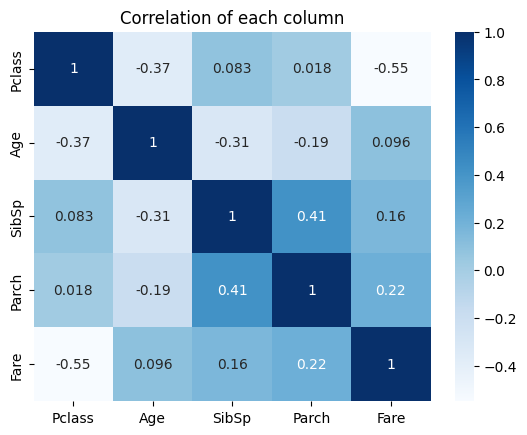

In [9]:
correlation = df.drop(columns="Survived").corr()
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.title("Correlation of each column");

In [19]:
# # fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(16, 8))
# # fig, ax = plt.subplots(figsize=(15, 5))
# # cols = ["Sex", "Pclass", "Embarked", "SibSp", "Parch"]
# cols = ["Sex"]
# # for col, ax in zip(cols, axs.flat):
# for col in cols:
#     print(col)
#     a = pd.pivot_table(df, index="Survived", values={col}, aggfunc=np.mean)
#     # a.plot(kind="bar")
#     a

In [10]:
# Histogram survived with their age
# plt.hist(x=df["Survived"], y=df["Sex"])

In [11]:
df["Survived"].corr(df["Age"])

-0.07722109457217764

In [13]:
# df["Survived"].corr(df["Sex"])

In [ ]:
correlation

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

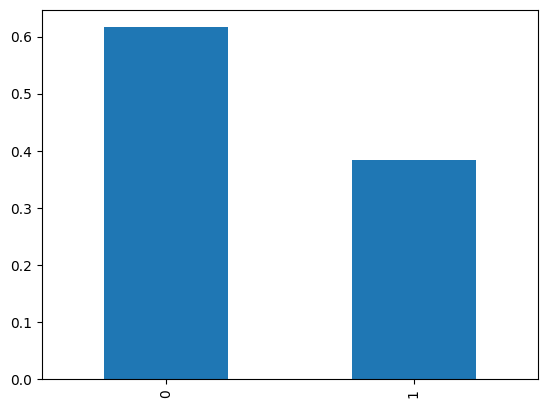

In [ ]:
df["Survived"].value_counts(normalize=True).plot(kind="bar")

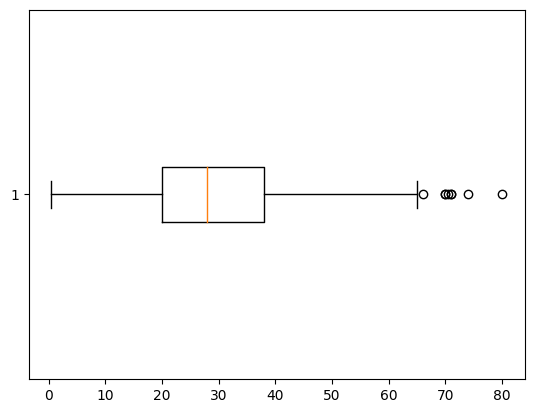

In [ ]:
plt.boxplot(df["Age"], vert=False);

In [ ]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
a = pd.pivot_table(df, index="Pclass", values="Survived", aggfunc=np.mean)
a

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
pd.pivot_table(df, index="Sex", values="Survived", aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Pclass'>

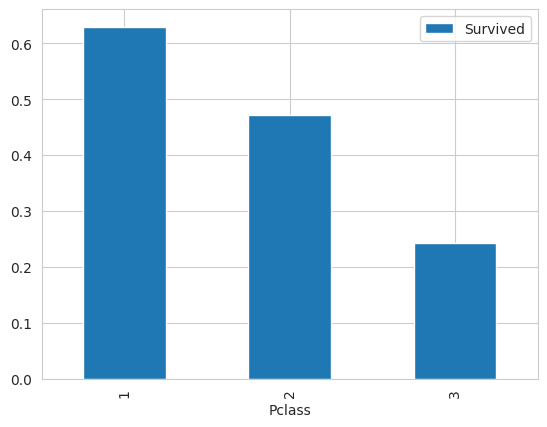

In [22]:
a.plot(kind="bar")

In [ ]:
pd.pivot_table(df, index="Embarked", values="Survived", aggfunc=np.mean)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [ ]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
pd.pivot_table(df, index="SibSp", values="Survived", aggfunc=np.mean)

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [ ]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [12]:
a = pd.pivot_table(df, index="Parch", values="Survived", aggfunc=np.mean)
a

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


<AxesSubplot:xlabel='Parch'>

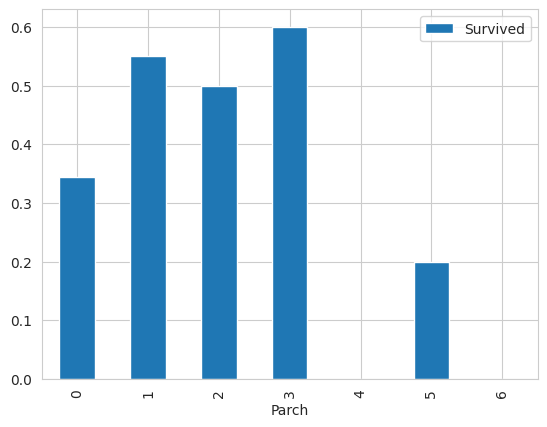

In [13]:
a.plot(kind="bar")

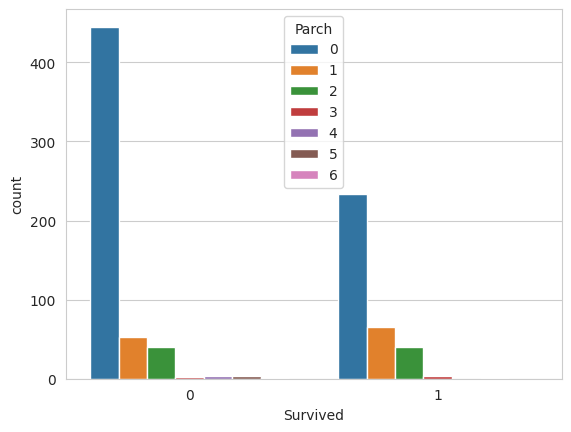

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Parch',data=df)
plt.show()

In [15]:
df["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [16]:
pd.pivot_table(df, index="Parch", values="Survived", aggfunc="count")

,Survived
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


In [ ]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


In [ ]:
pd.pivot_table(df, index="Embarked", aggfunc=np.mean)

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived
Embarked,,,,,,,
C,30.814769,68.296767,0.415385,1.746154,0.530769,0.423077,0.607692
Q,28.089286,18.265775,0.392857,2.785714,0.571429,0.750000,0.285714
S,29.445397,27.476284,0.438628,2.328520,0.664260,0.523466,0.362816


In [ ]:
df[["Pclass", ""]]

In [ ]:
df["Fare"].nunique()

248

In [ ]:
pd.pivot_table(df, index="Pclass", values="Fare", aggfunc=np.mean)

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [ ]:
pd.pivot_table(df, index="Survived", values="Fare", aggfunc=np.mean)

,Fare
Survived,
0,22.117887
1,48.395408


In [17]:
pd.pivot_table(df, index="Parch", values="Survived", aggfunc=np.mean).sort_values(by="Survived", ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [27]:
pd.pivot_table(df, index="SibSp", values="Survived", aggfunc=np.mean).sort_values(by="Survived", ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [28]:
# plt.hist(a)

In [30]:
def visualization(df, index, value):
    result = pd.pivot_table(df, index=index, values=value, aggfunc=np.mean).sort_values(by=value, ascending=False)

    return result

In [105]:
a = visualization(df, "Pclass", "Survived")
a

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0.5, 1.0, 'Survived from Pclass')

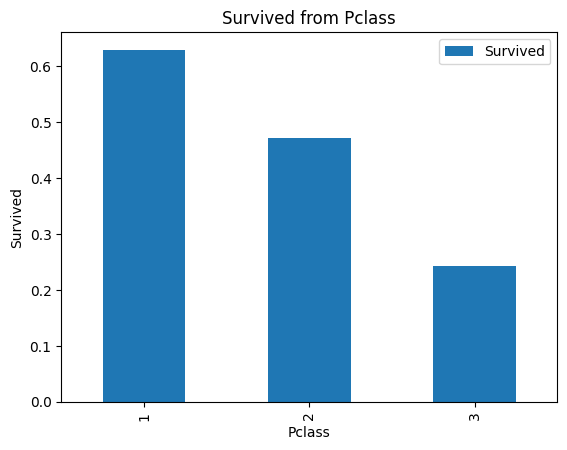

In [106]:
a.plot(kind="bar", stacked=True)
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.title("Survived from Pclass")

In [45]:
# a.hist(y="Survived")
a.head()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [53]:
pd.pivot_table(df, index="Survived", values="Age", aggfunc=np.mean)

,Age
Survived,
0,30.626179
1,28.343690


In [65]:
b = pd.pivot_table(df, index="Age", values="Survived", aggfunc="count")

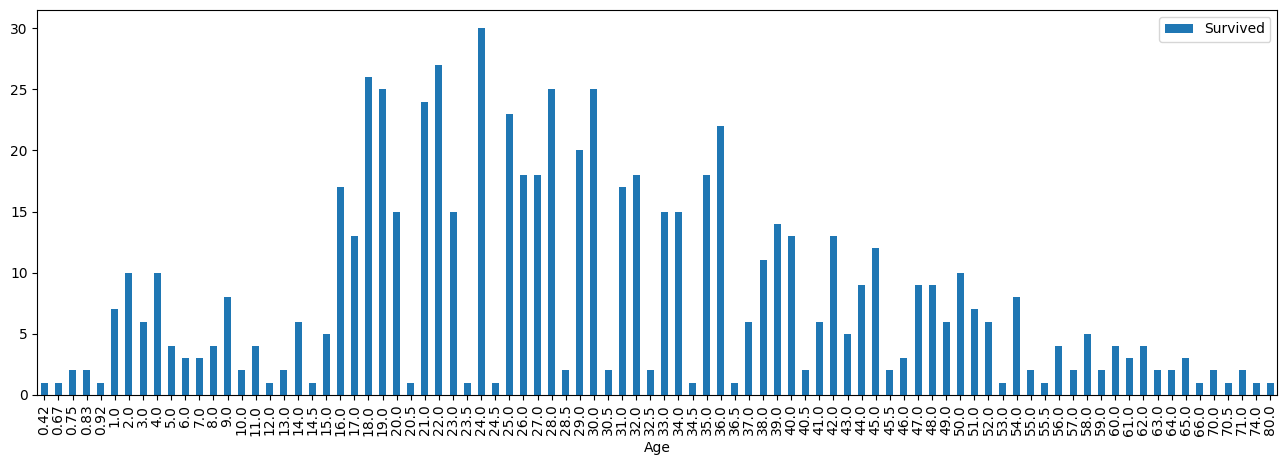

In [66]:
fig, ax = plt.subplots(figsize=(16, 5))
b.plot(kind="bar", ax=ax);

In [86]:
# c = pd.pivot_table(df, index="Cabin", values="Survived", aggfunc="count").sort_values(by="Survived", ascending=False)

In [85]:
# fig, ax = plt.subplots(figsize=(30, 5))
# c.plot(kind="bar", ax=ax)

In [77]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [83]:
df["Cabin"].isnull().sum()
# Drop "Cabin" columns it contains more than 50% null value

687

In [91]:
df["Title"] = df["Name"].str.split(" ", expand=True)[1]

In [92]:
df["Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,'], dtype=object)

LabelEncoding

In [108]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(item):
    encoder = LabelEncoder()

    df[item] = encoder.fit_transform(df[item])

    return df

<AxesSubplot:xlabel='Survived', ylabel='count'>

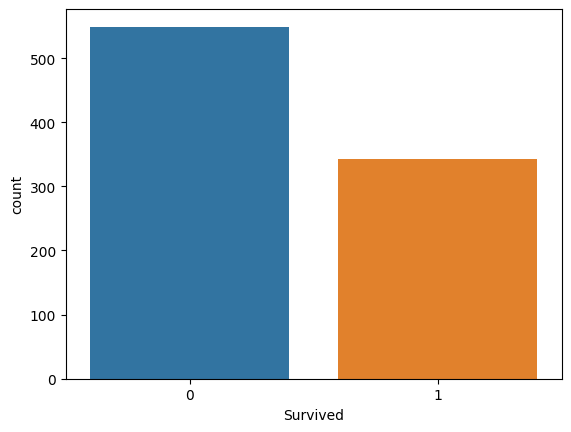

In [109]:
sns.countplot(x="Survived", data=df)

In [111]:
# discretised
df["age"] = pd.cut(df["Age"], bins=8)

In [114]:
df["age"].unique()

[(20.315, 30.263], (30.263, 40.21], NaN, (50.158, 60.105], (0.34, 10.368], (10.368, 20.315], (60.105, 70.052], (40.21, 50.158], (70.052, 80.0]]
Categories (8, interval[float64]): [(0.34, 10.368] < (10.368, 20.315] < (20.315, 30.263] < (30.263, 40.21] < (40.21, 50.158] < (50.158, 60.105] < (60.105, 70.052] < (70.052, 80.0]]

In [115]:
df["age"].value_counts()

(20.315, 30.263]    230
(30.263, 40.21]     155
(10.368, 20.315]    115
(40.21, 50.158]      86
(0.34, 10.368]       64
(50.158, 60.105]     42
(60.105, 70.052]     17
(70.052, 80.0]        5
Name: age, dtype: int64

One Hot Encoding

In [122]:
cols = df.drop(columns=["Survived", "Name", "Cabin"]).columns.tolist()
# pd.get_dummies(df, columns=cols)

In [123]:
# One Hot encoding vs Label encoding

In [23]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [25]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [29]:
df.Cabin.str[0].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [39]:
df["d"] = df.Cabin.astype(str).str[0]

In [44]:
pd.pivot_table(df, index="d", values="Survived", aggfunc=np.mean)

,Survived
d,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000
n,0.299854
